In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


df = pd.read_csv('data/musicgenre.csv')

# Handle missing values
df = df.dropna(subset=['music_genre'])
df = df.replace("?", None).dropna()

# Encode categorical features
encoder = LabelEncoder()
df['music_genre'] = encoder.fit_transform(df['music_genre'])
df['key'] = encoder.fit_transform(df['key'])
df['mode'] = encoder.fit_transform(df['mode'])
df.head()

# Scale the features
df["duration_ms"] = df["duration_ms"] / 1000

# Drop irrelevant columns
df.drop(['track_name', 'instance_id', 'obtained_date', 'artist_name'], axis=1, inplace=True)

# Split the data into features and target
X = df.drop(columns=['music_genre'])
y = df['music_genre']
X.head()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pas inutikle car moins de feature et on garde a opeu pres les memes resultats donc pas trop mal mais peut mieux faire.
Résultats de base, test acp/KNN, test avec les 10 meilleurs feature ACP (mettre elbow)
Normaliser les données important pour KNN, comparer avec et sans normalisation?
ACP centre de gravité on regroupe les centres proches

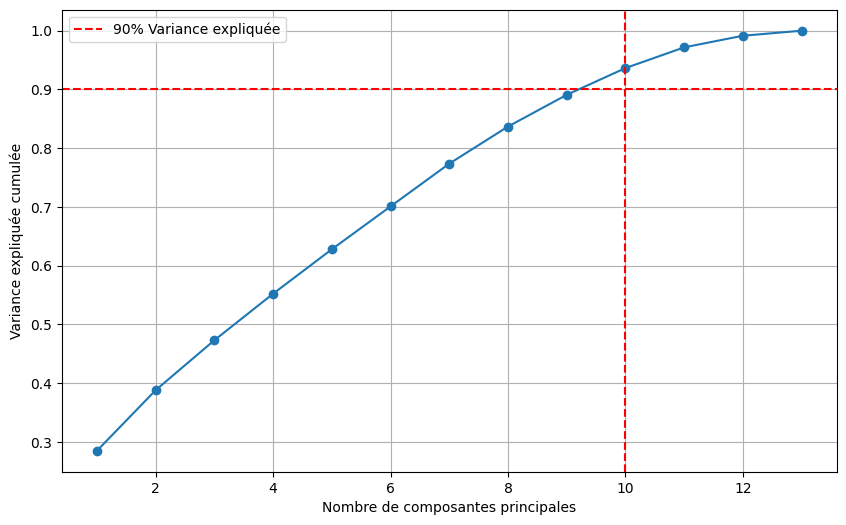

In [26]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Elbow plot to determine the number of components to select
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid()
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance expliquée')
plt.axvline(x=np.where(cumulative_variance >= 0.9)[0][0] + 1, color='r', linestyle='--')
plt.legend()
plt.show()

In [27]:
# Contribution of each feature to the components
components = pd.DataFrame(pca.components_, columns=X.columns)
components.index = [f'PC{i+1}' for i in range(len(components))]

In [28]:
# Perform PCA to reduce to 2 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
# Define models to be trained
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": accuracy,
        "report": report
    }
    print(f"{name} Model")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Compare model performance
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    for label, metrics in result['report'].items():
        if isinstance(metrics, dict):
            metrics_str = ", ".join([f"{key}: {value:.2f}" for key, value in metrics.items()])
            print(f"  {label}: {metrics_str}")
    print("-" * 60)

Random Forest Model
Accuracy: 0.4790463497704724
              precision    recall  f1-score   support

           0       0.33      0.30      0.32      1349
           1       0.68      0.63      0.65      1349
           2       0.49      0.43      0.46      1341
           3       0.78      0.83      0.80      1350
           4       0.45      0.49      0.46      1346
           5       0.53      0.51      0.52      1340
           6       0.34      0.37      0.35      1356
           7       0.47      0.44      0.45      1356
           8       0.30      0.28      0.29      1351
           9       0.43      0.51      0.46      1368

    accuracy                           0.48     13506
   macro avg       0.48      0.48      0.48     13506
weighted avg       0.48      0.48      0.48     13506

------------------------------------------------------------
Logistic Regression Model
Accuracy: 0.4897082778024582
              precision    recall  f1-score   support

           0       0.